In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import pandas as pd
import seaborn as sns
import matplotlib as mp
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LogNorm

sns.set()

In [ ]:
# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=',',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
tlp_v,tlp_length,nominal,amplitude,width = datafileread('cz_regulator_V2.csv',14)

print("Width : %E -> %E" % (np.amin(width), np.amax(width)))

#print(width)
#print(inputAmplitude)
#print(tlp_length)
#width *= 1e9
tlp_length = np.round(tlp_length * 1e9, decimals=1)
#inputAmplitude = np.round(inputAmplitude, decimals=1)
#print(inputAmplitude)
width = np.fabs(width)

df_amplitude = pd.DataFrame({'x': tlp_length, 'y': tlp_v, 'z': amplitude})
df_amplitude = df_amplitude.pivot(index='y',columns='x', values='z')

df_width = pd.DataFrame({'x': tlp_length, 'y': tlp_v, 'z': width})
df_width = df_width.pivot(index='y',columns='x', values='z')

print(df_amplitude)


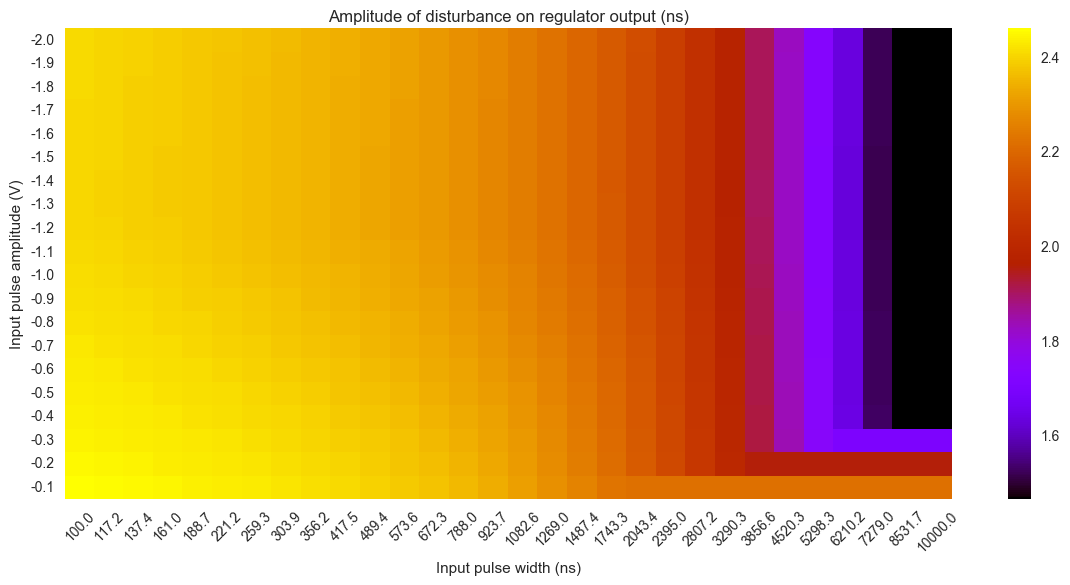

In [21]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(df_amplitude, cmap='gnuplot')
ax.set_xlabel("Input pulse width (ns)")
ax.set_ylabel("Input pulse amplitude (V)")
plt.grid(True, which="both")

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(45)
    
ax.set_title("Amplitude of disturbance on regulator output (ns)")
plt.plot()
plt.tight_layout()
plt.savefig("../../src/4/figures/regulator_cz_V2_amplitude.png", pad_inches=0.3)
plt.show()

1.458e-07
1.45583e-05


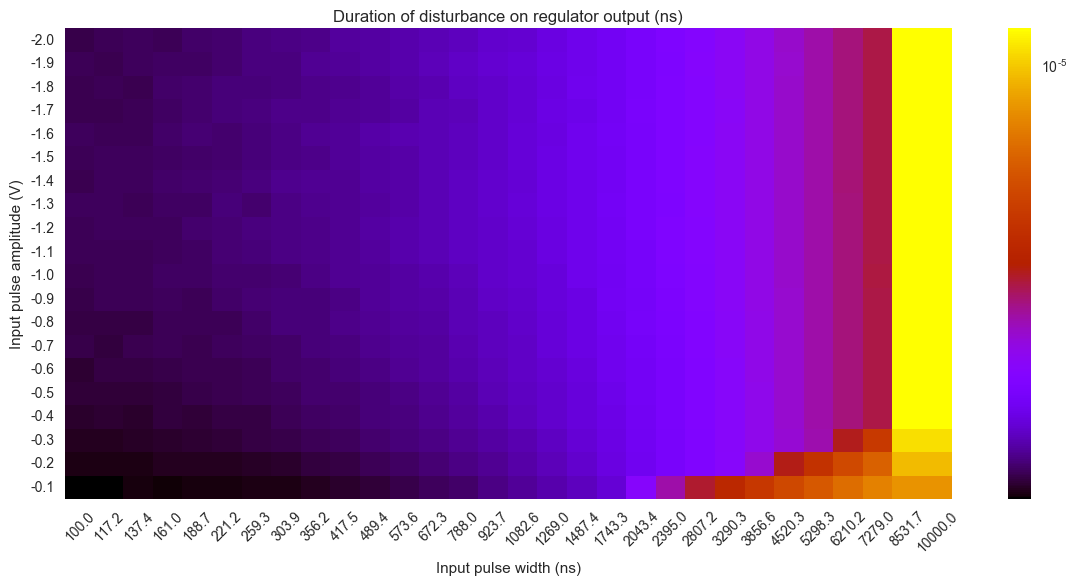

In [23]:
print(df_width.values.min())
print(df_width.values.max())

plt.figure(figsize=(12,6))
ax = sns.heatmap(df_width, cmap='gnuplot', norm=LogNorm(vmin=df_width.values.min(), vmax=df_width.values.max()))
#ax = sns.heatmap(df_width, cmap='gnuplot')
ax.set_xlabel("Input pulse width (ns)")
ax.set_ylabel("Input pulse amplitude (V)")
plt.grid(True, which="both")

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(45)
    
ax.set_title("Duration of disturbance on regulator output (ns)")
#plt.xscale('log')
plt.plot()
plt.tight_layout()
plt.savefig("../../src/4/figures/regulator_cz_v2_width.png", pad_inches=0.3)
plt.show()